<a href="https://colab.research.google.com/github/anush-kar/Speech-Emotion-Recognition/blob/main/tess_speech_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! kaggle datasets download ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 98% 420M/428M [00:04<00:00, 111MB/s]
100% 428M/428M [00:04<00:00, 92.2MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp /content/drive/MyDrive/Colab-Notebooks/kaggle_API_credentials/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! unzip toronto-emotional-speech-set-tess.zip -d /content/drive/MyDrive/ColabNotebooks/tess-dataset

In [ ]:
!pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
import seaborn as sns
from IPython.display import Audio
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/TESS-Toronto-emotional-speech-set-data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print("Dataset is loaded")

Dataset is loaded


In [ ]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/TESS-Toronto-emotional-...,fear
1,/content/drive/MyDrive/TESS-Toronto-emotional-...,fear
2,/content/drive/MyDrive/TESS-Toronto-emotional-...,fear
3,/content/drive/MyDrive/TESS-Toronto-emotional-...,fear
4,/content/drive/MyDrive/TESS-Toronto-emotional-...,fear


In [ ]:
df['label'].value_counts()

label
fear       400
ps         400
sad        400
angry      400
disgust    400
happy      400
neutral    400
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

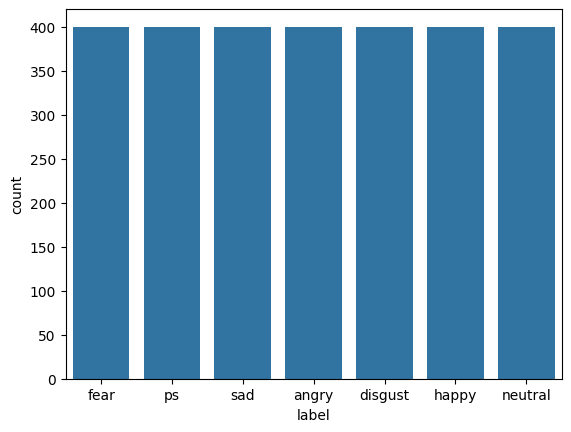

In [ ]:
sns.countplot(x='label', data=df)

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,3))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x=librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(12,3))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

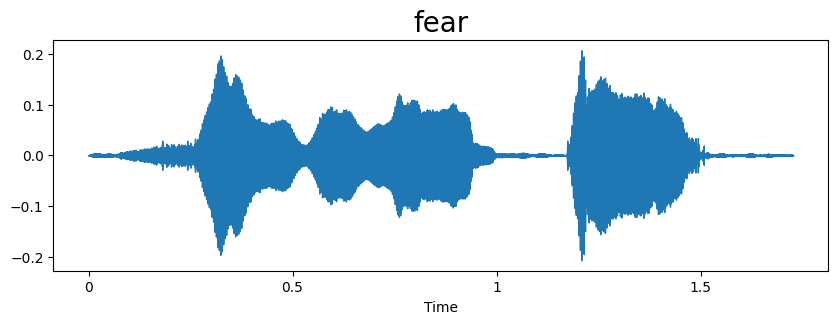

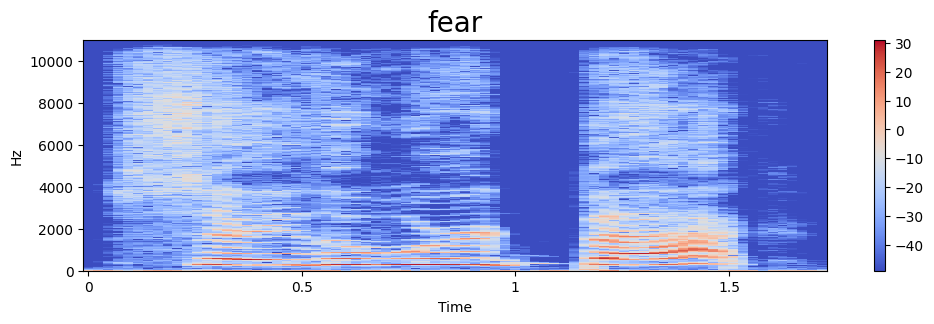

In [ ]:
emotion='fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
display(Audio(path))

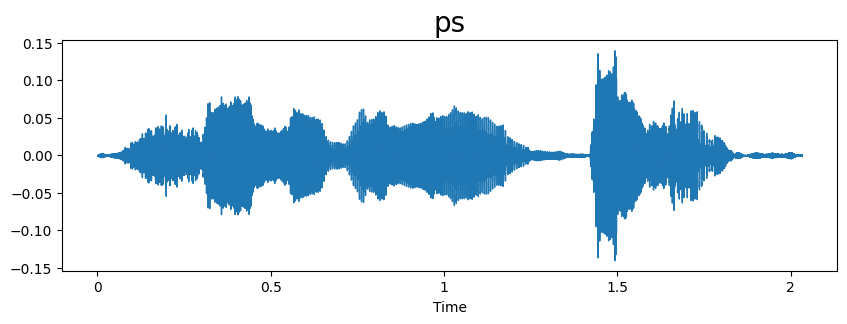

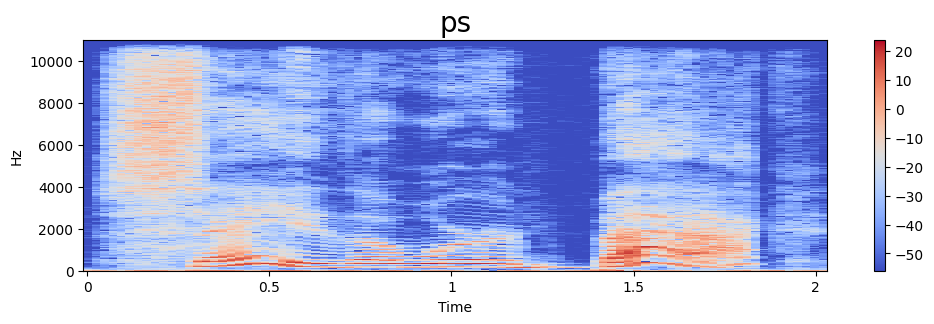

In [ ]:
emotion='ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
display(Audio(path))

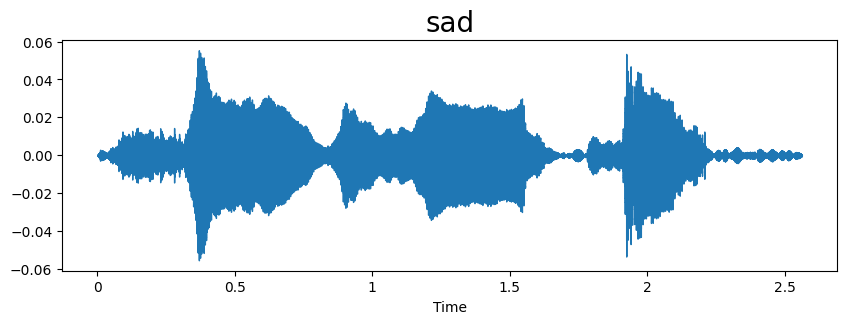

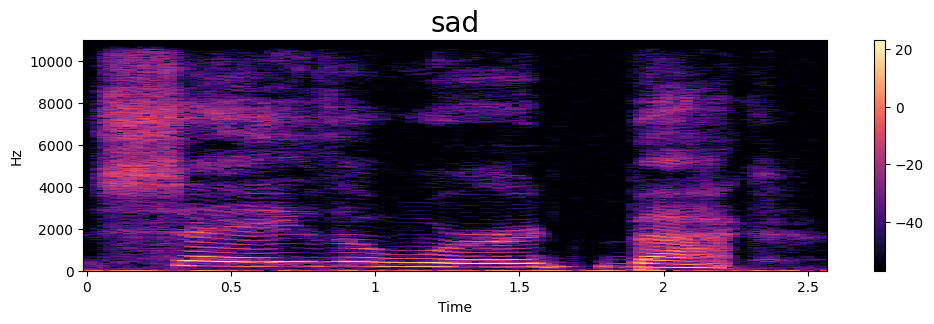

In [ ]:
emotion='sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
display(Audio(path))

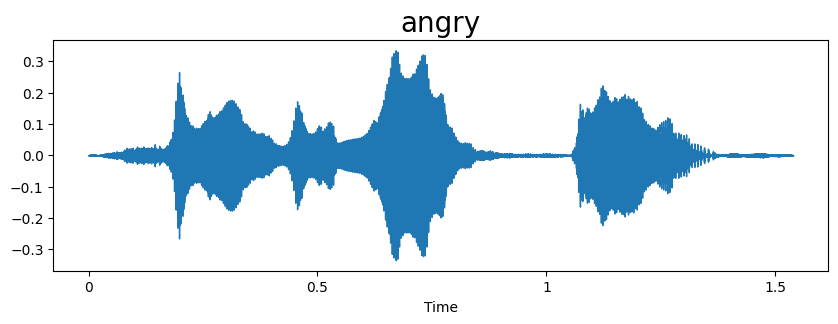

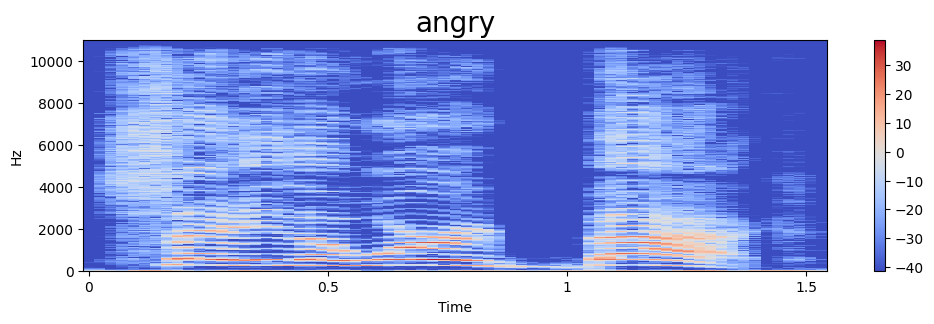

In [ ]:
emotion='angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
display(Audio(path))

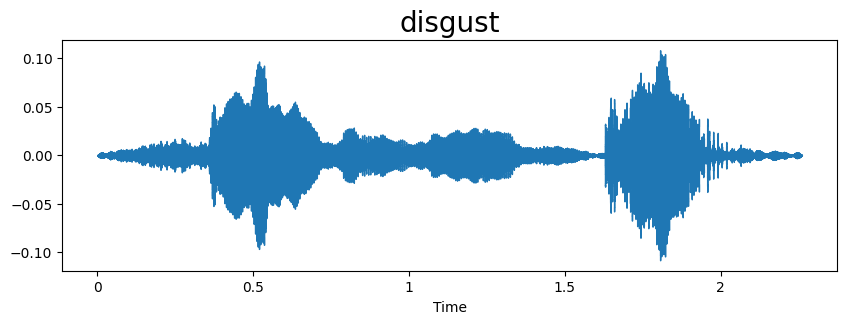

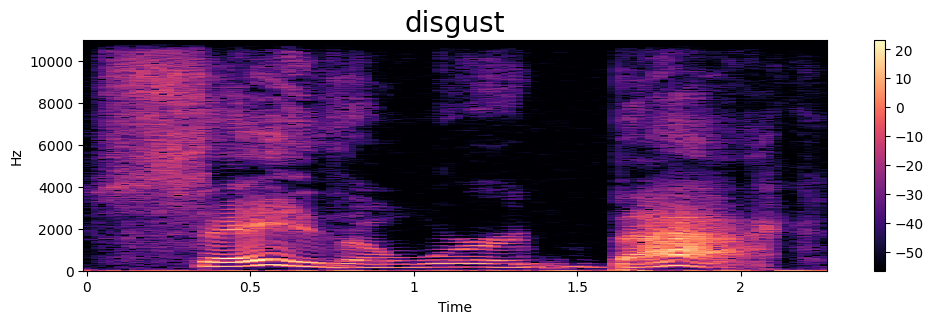

In [ ]:
emotion='disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
display(Audio(path))

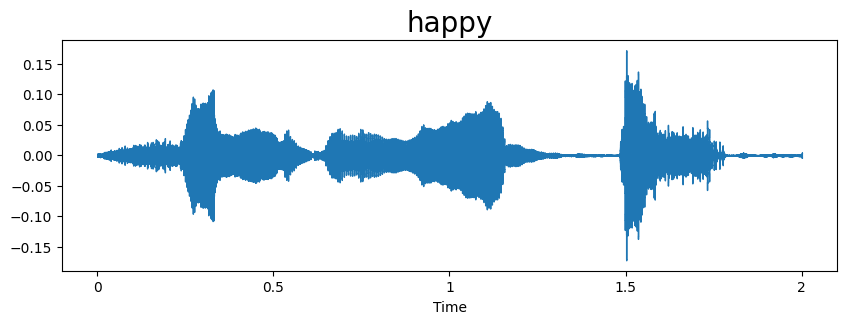

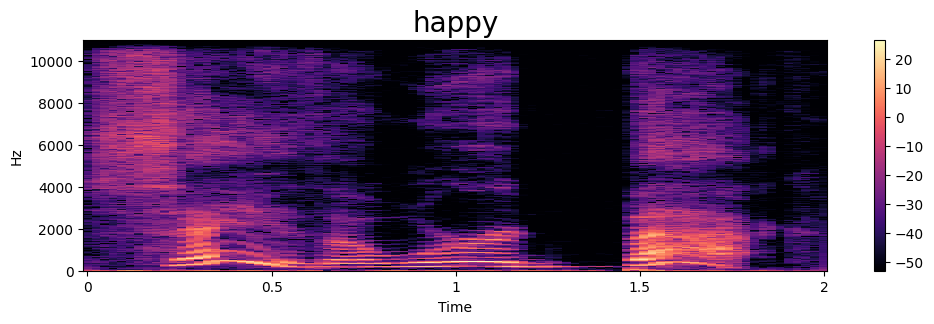

In [ ]:
emotion='happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
display(Audio(path))

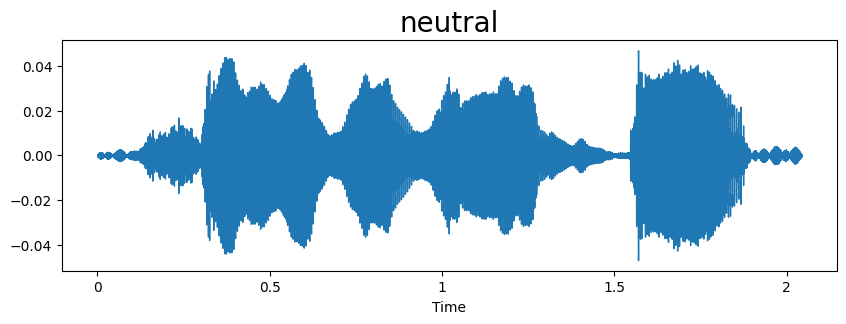

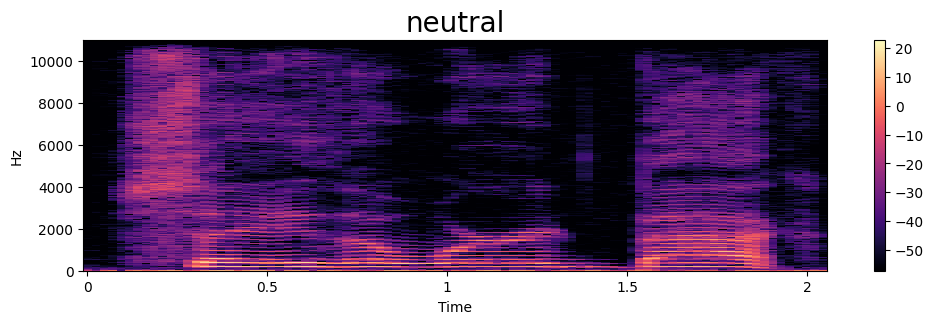

In [ ]:
emotion='neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
display(Audio(path))

## Feature Extraction

In [ ]:
def feature_extraction(file_name):
    X, sample_rate = librosa.load(file_name, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
import resampy

In [ ]:
X_mfcc = df['speech'].apply(lambda x: feature_extraction(x))

In [ ]:
X_mfcc

0       [-456.2984, 95.33353, 17.71685, -33.765804, -1...
1       [-445.36737, 91.2761, -0.58949184, -17.314266,...
2       [-483.49344, 111.59739, 23.837387, -36.05289, ...
3       [-500.6967, 90.146454, 24.972002, -9.280767, -...
4       [-439.96594, 86.90804, 27.158766, -7.8167105, ...
                              ...                        
2795    [-423.2102, 95.634254, 32.865875, 36.295815, -...
2796    [-428.91977, 88.893196, 39.384377, 44.69168, 6...
2797    [-407.01517, 97.73453, 22.763187, 30.531254, -...
2798    [-417.8746, 115.71776, 25.814102, 31.332733, -...
2799    [-359.31107, 83.19714, 32.520493, 28.11811, -6...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

## Sequential Model Creation


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
from keras.callbacks import ModelCheckpoint
import keras.utils
checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history = model.fit(X, y, validation_split=0.2, epochs=40, batch_size=64, callbacks=[model_checkpoint_callback])

Epoch 1/40
35/35 [==============================] - 6s 181ms/step - loss: 0.1837 - accuracy: 0.9478 - val_loss: 1.9330 - val_accuracy: 0.6571
Epoch 2/40
35/35 [==============================] - 8s 245ms/step - loss: 0.2169 - accuracy: 0.9335 - val_loss: 2.7771 - val_accuracy: 0.5518
Epoch 3/40
35/35 [==============================] - 7s 185ms/step - loss: 0.1260 - accuracy: 0.9665 - val_loss: 2.5769 - val_accuracy: 0.4554
Epoch 4/40
35/35 [==============================] - 8s 216ms/step - loss: 0.1426 - accuracy: 0.9621 - val_loss: 4.0941 - val_accuracy: 0.2768
Epoch 5/40
35/35 [==============================] - 7s 196ms/step - loss: 0.1419 - accuracy: 0.9540 - val_loss: 2.5765 - val_accuracy: 0.4357
Epoch 6/40
35/35 [==============================] - 7s 191ms/step - loss: 0.0741 - accuracy: 0.9795 - val_loss: 2.0088 - val_accuracy: 0.4982
Epoch 7/40
35/35 [==============================] - 8s 233ms/step - loss: 0.0622 - accuracy: 0.9812 - val_loss: 2.6138 - val_accuracy: 0.4500
Epoch 

In [ ]:
keras.models.load_model(checkpoint_filepath)